In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## drop month,day, year
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
## divide independent and dependent features
X = df.drop('FWI',axis=1)
Y = df['FWI']

In [9]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [10]:
## train test  split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.25,random_state=42)

In [11]:
## features selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.554755,-0.324112,-0.379870,0.743910,0.599414,0.455433,0.700603,0.562107,0.655576,0.324594
RH,-0.554755,1.000000,0.418173,0.186281,-0.607641,-0.276259,-0.080179,-0.636500,-0.210007,-0.363471,-0.540757
Ws,-0.324112,0.418173,1.000000,0.215535,-0.278513,-0.167514,-0.015666,-0.331193,-0.114361,-0.224573,-0.300060
Rain,-0.379870,0.186281,0.215535,1.000000,-0.602596,-0.366534,-0.397206,-0.439679,-0.385545,-0.457398,-0.065942
FFMC,0.743910,-0.607641,-0.278513,-0.602596,1.000000,0.653218,0.561035,0.779464,0.640905,0.774792,0.289907
DMC,0.599414,-0.276259,-0.167514,-0.366534,0.653218,1.000000,0.891554,0.650570,0.985115,0.692633,0.242696
DC,0.455433,-0.080179,-0.015666,-0.397206,0.561035,0.891554,1.000000,0.485631,0.953268,0.654831,-0.039733
ISI,0.700603,-0.636500,-0.331193,-0.439679,0.779464,0.650570,0.485631,1.000000,0.604646,0.763974,0.303519
BUI,0.562107,-0.210007,-0.114361,-0.385545,0.640905,0.985115,0.953268,0.604646,1.000000,0.698935,0.139437
Classes,0.655576,-0.363471,-0.224573,-0.457398,0.774792,0.692633,0.654831,0.763974,0.698935,1.000000,0.199110


<Axes: >

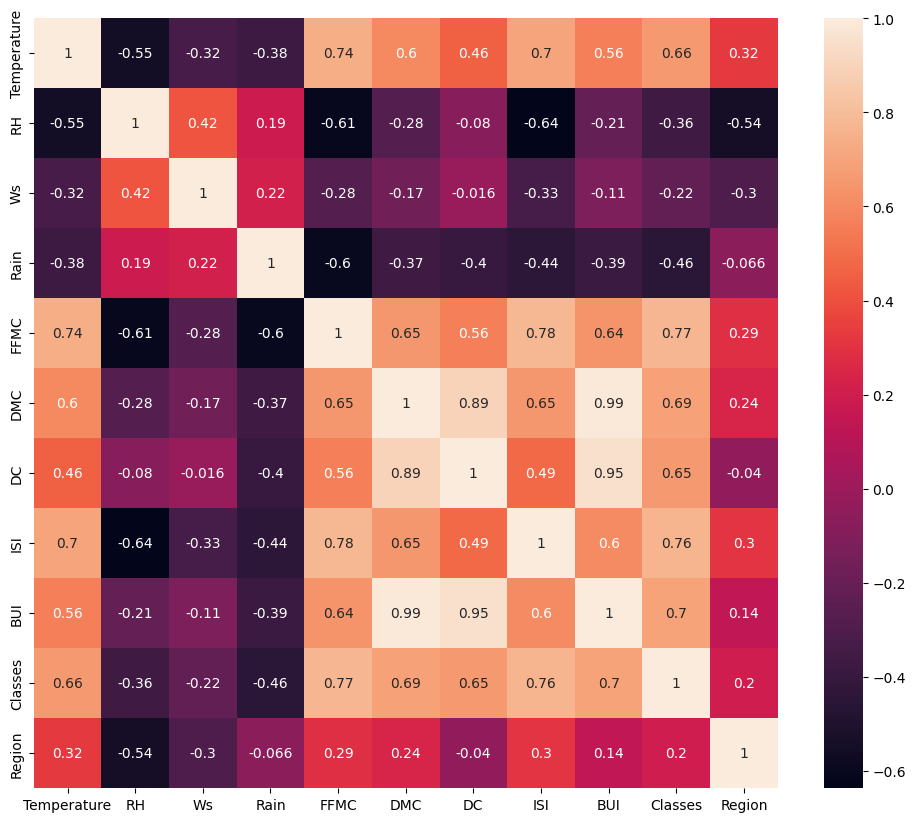

In [12]:
## multi collinearity
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True)

In [13]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [14]:
## Threshold
corr_features = correlation(X_train,0.85)

In [15]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

#### feature scalling or standerization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
91,28,80,21,16.8,52.5,8.7,0.6,0,0
83,36,53,16,0.0,89.5,37.6,10.4,1,0
216,30,66,15,0.2,73.5,4.1,1.5,0,1
221,30,80,15,0.0,83.1,7.9,3.5,1,1


Text(0.5, 1.0, 'X_train after scalling')

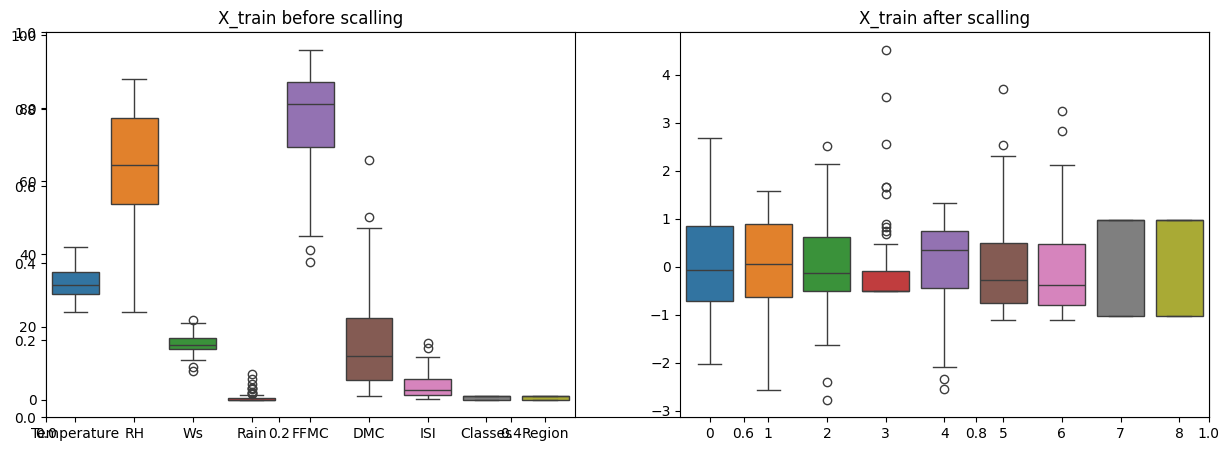

In [17]:
## Box plots to see the effect of standardScaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_train after scalling')

### Linear Regression model

Mean absolute Error: 0.756682283006359
R2 score: 0.9617739416141229


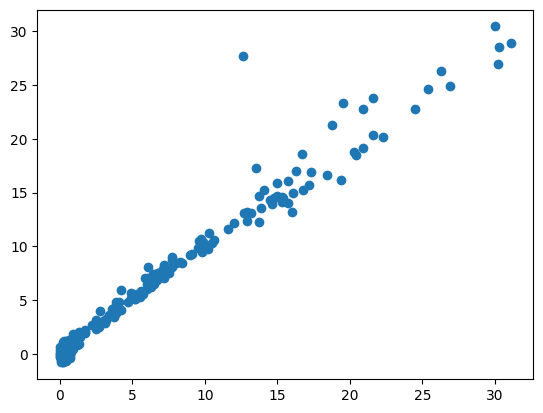

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
regression = LinearRegression()
regression.fit(X_train_scaled,Y_train)
Y_pred = regression.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("Mean absolute Error:",mae)
print("R2 score:",r2)
plt.scatter(Y_test,Y_pred)

Mean absolute Error: 1.3741197412202304
R2 score: 0.9294849243569611


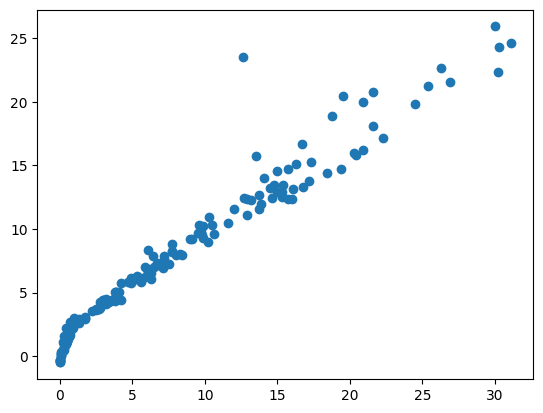

In [19]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("Mean absolute Error:",mae)
print("R2 score:",r2)
plt.scatter(Y_test,Y_pred)

Mean absolute Error: 0.7995456274793661
R2 score: 0.9626390285394024


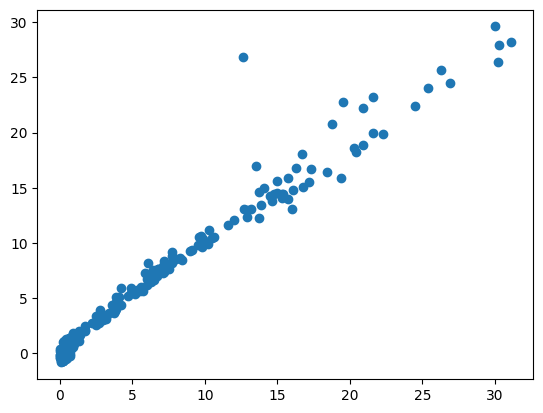

In [20]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("Mean absolute Error:",mae)
print("R2 score:",r2)
plt.scatter(Y_test,Y_pred)

Mean absolute Error: 2.1696686685099977
R2 score: 0.8464109923872387


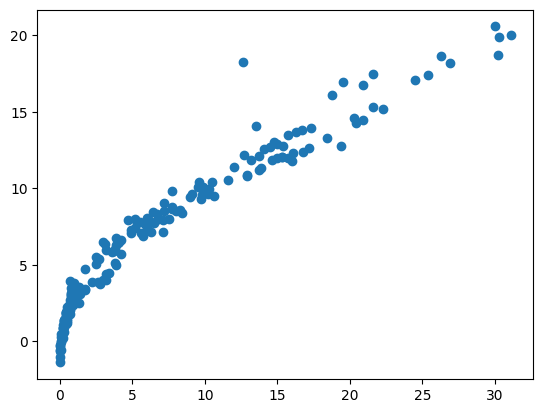

In [21]:
## ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,Y_train)
Y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("Mean absolute Error:",mae)
print("R2 score:",r2)
plt.scatter(Y_test,Y_pred)

Mean absolute Error: 0.7639709845738595
R2 score: 0.9619986025354034


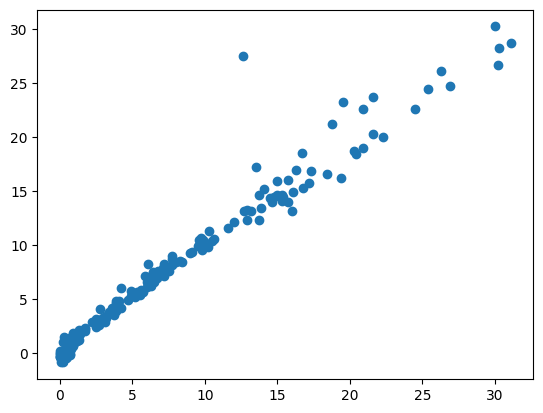

In [22]:
## Cross validation lasso
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)
print("Mean absolute Error:",mae)
print("R2 score:",r2)
plt.scatter(Y_test,y_pred)

In [23]:
scaler

StandardScaler()

In [24]:
ridge

Ridge()

### End to End ML model deployment

### Pickling the ML models, Preprocessing model standardscaler

In [ ]:
import pickle ## use ful when deploying model 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))